Sandbox python module, for running some simple experiments to verify that the code works.
Contains code from https://adapt-python.github.io/adapt/examples/Two_moons.html

In [112]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from tensorflow.keras import Model, Sequential
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.layers import Dense, Flatten

from datagen.datagen import make_moons_triplet
from datagen.visualize import visualizeShift2D, visualizeDecisionBoundary2D

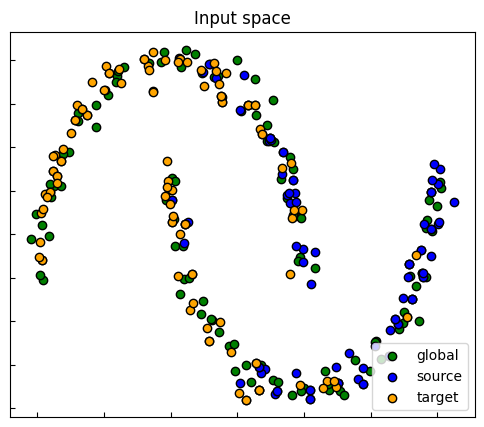

In [113]:
# Create dataset
Xs, ys, Xg, yg, Xt, yt = make_moons_triplet(bias=2)
visualizeShift2D(Xs,Xg,Xt)

In [114]:
# Define core supervised model
def get_task(activation="sigmoid", units=1) -> Model:
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(10, activation="relu"))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(units, activation=activation))
    return model

First train with source only by setting lambda=0 for DANN


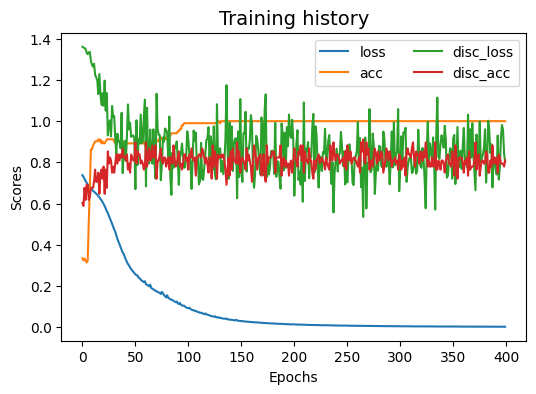

In [115]:
from adapt.feature_based import DANN

src_only = DANN(task=get_task(), loss="bce", optimizer=Adam(0.001, beta_1=0.5),
                copy=True, lambda_=0., metrics=["acc"], random_state=0)
src_only.fit(Xs, ys, Xt, yt, epochs=400, batch_size=34, verbose=0)
pd.DataFrame(src_only.history_).plot(figsize=(6, 4))
plt.title("Training history", fontsize=14); plt.xlabel("Epochs"); plt.ylabel("Scores")
plt.legend(ncol=2)
plt.show()

Visualize the decision boundary of the trained model

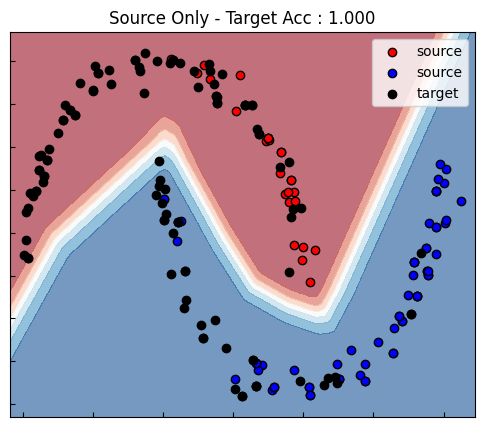

In [116]:
visualizeDecisionBoundary2D(Xs,Xt,ys,yt, src_only, name="Source Only")

Repeat the same process with DANN (with nonzero lambda)

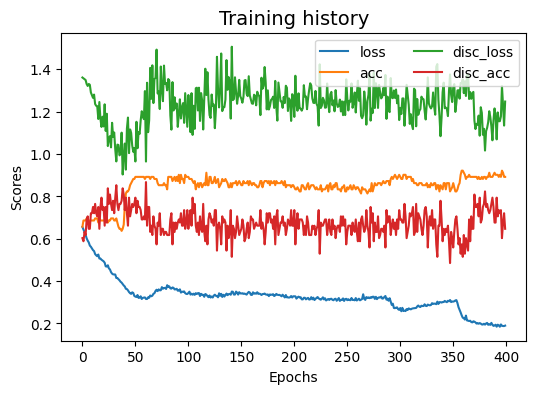

In [117]:
dann = DANN(task=get_task(), loss="bce", optimizer=Adam(0.001, beta_1=0.5),
            copy=True, lambda_=1, metrics=["acc"], random_state=0)
dann.fit(Xs, ys, Xt, yt, epochs=400, batch_size=34, verbose=0);
pd.DataFrame(dann.history_).plot(figsize=(6, 4))
plt.title("Training history", fontsize=14); plt.xlabel("Epochs"); plt.ylabel("Scores")
plt.legend(ncol=2)
plt.show()

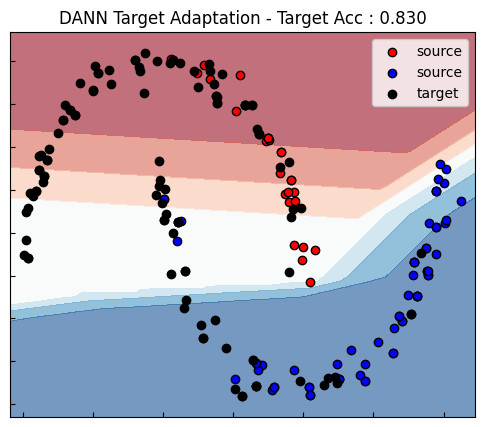

In [118]:
visualizeDecisionBoundary2D(Xs,Xt,ys,yt, dann, name="DANN Target Adaptation")

Now repeat the process, but train to adapt to the global data points, then evaluate on target

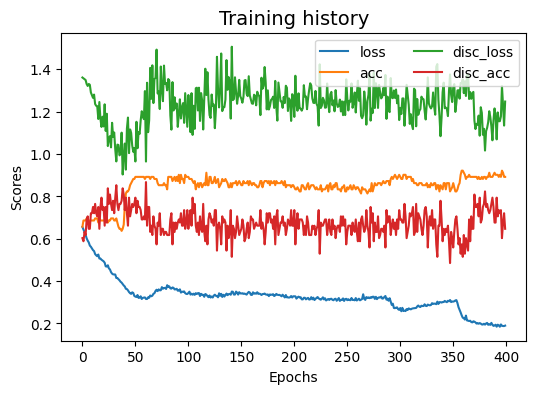

In [119]:
dann_global = DANN(task=get_task(), loss="bce", optimizer=Adam(0.001, beta_1=0.5),
            copy=True, lambda_=1, metrics=["acc"], random_state=0)
dann_global.fit(Xs, ys, Xg, yg, epochs=400, batch_size=34, verbose=0);
pd.DataFrame(dann.history_).plot(figsize=(6, 4))
plt.title("Training history", fontsize=14); plt.xlabel("Epochs"); plt.ylabel("Scores")
plt.legend(ncol=2)
plt.show()

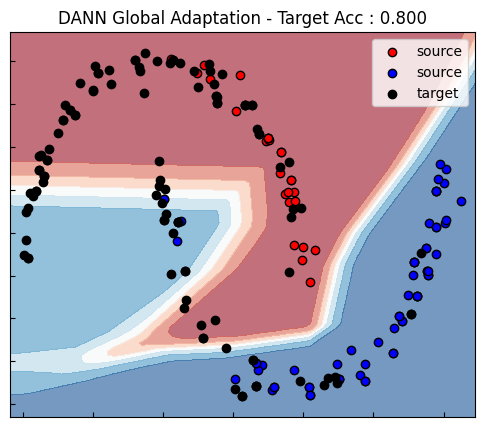

In [120]:
visualizeDecisionBoundary2D(Xs,Xt,ys,yt, dann_global, name="DANN Global Adaptation")